In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import Binarizer

In [102]:
df = pd.read_csv("D:/projects/flood&earthquake/Flood Prediction Factors/Flood Prediction Factors.csv")

In [103]:
pd.set_option('display.max_columns', None)

In [104]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0.475


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [106]:
df["FloodProbability"] = np.where(df['FloodProbability'] > 0.5, 1, 0)

In [107]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,1
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,1
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0


In [108]:
df.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [109]:
df.duplicated().sum()

0

In [110]:
corr = df.corr()

<Axes: >

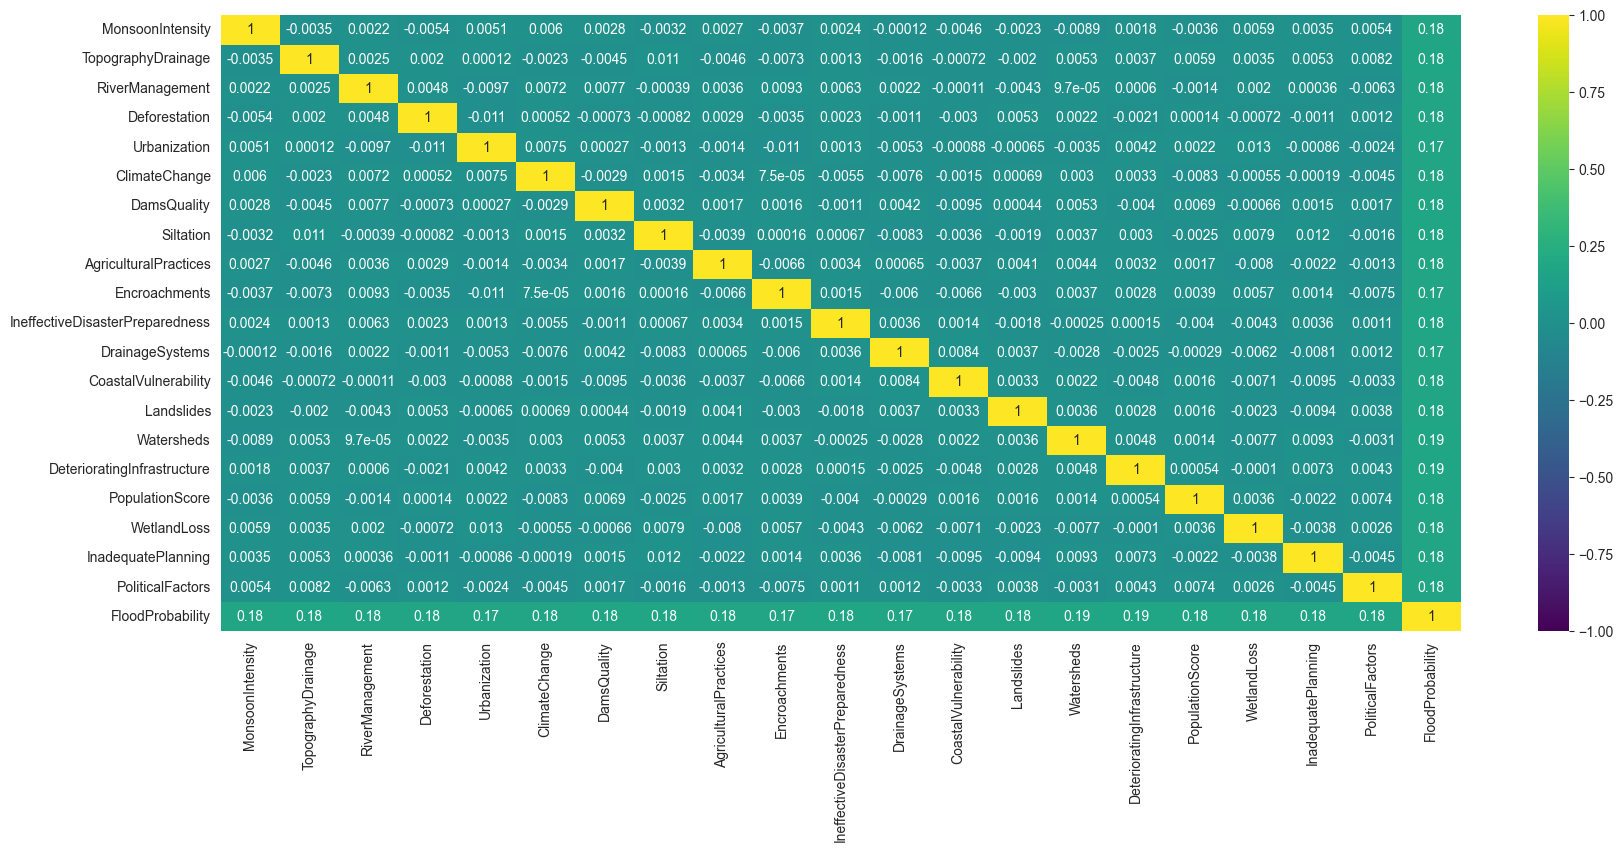

In [111]:
plt.figure(figsize=(20 , 8))
sns.heatmap(corr , vmin = -1 , vmax = 1 , cmap = "viridis" , annot = True)

<Axes: >

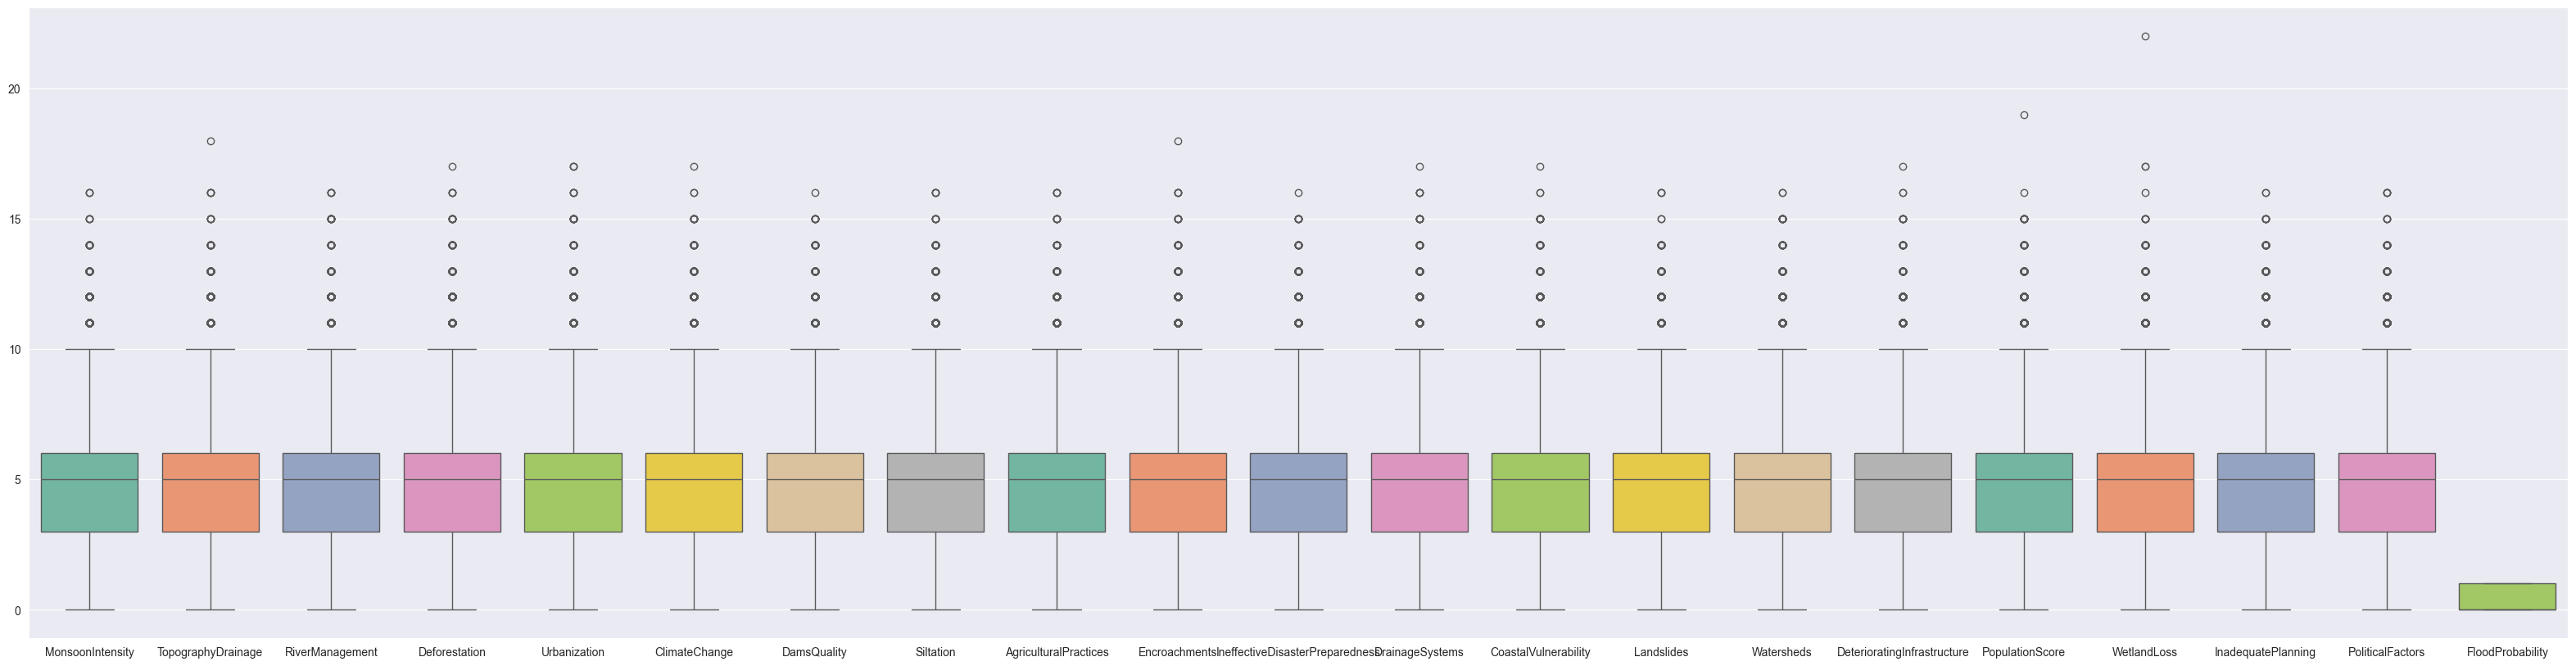

In [112]:
plt.figure(figsize=(40, 10))
sns.boxplot(data=df, orient="v", palette="Set2")

In [113]:
def z_score(df, column_name):

    x = df[column_name]

    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = (x < lower_bound) | (x > upper_bound)

    df_cleaned = df[~outliers]

    return df_cleaned

In [114]:
columns_to_normalize = ["MonsoonIntensity", "TopographyDrainage", "RiverManagement", "Deforestation", "Urbanization", "ClimateChange", "DamsQuality", "Siltation", "AgriculturalPractices", "Encroachments", "IneffectiveDisasterPreparedness", "DrainageSystems", "CoastalVulnerability", "Landslides", "Watersheds", "DeterioratingInfrastructure", "PopulationScore", "WetlandLoss"]

df_cleaned = df.copy()  # Create a copy of the original DataFrame

for column in columns_to_normalize:
    df_cleaned = z_score(df_cleaned,column)

<Axes: >

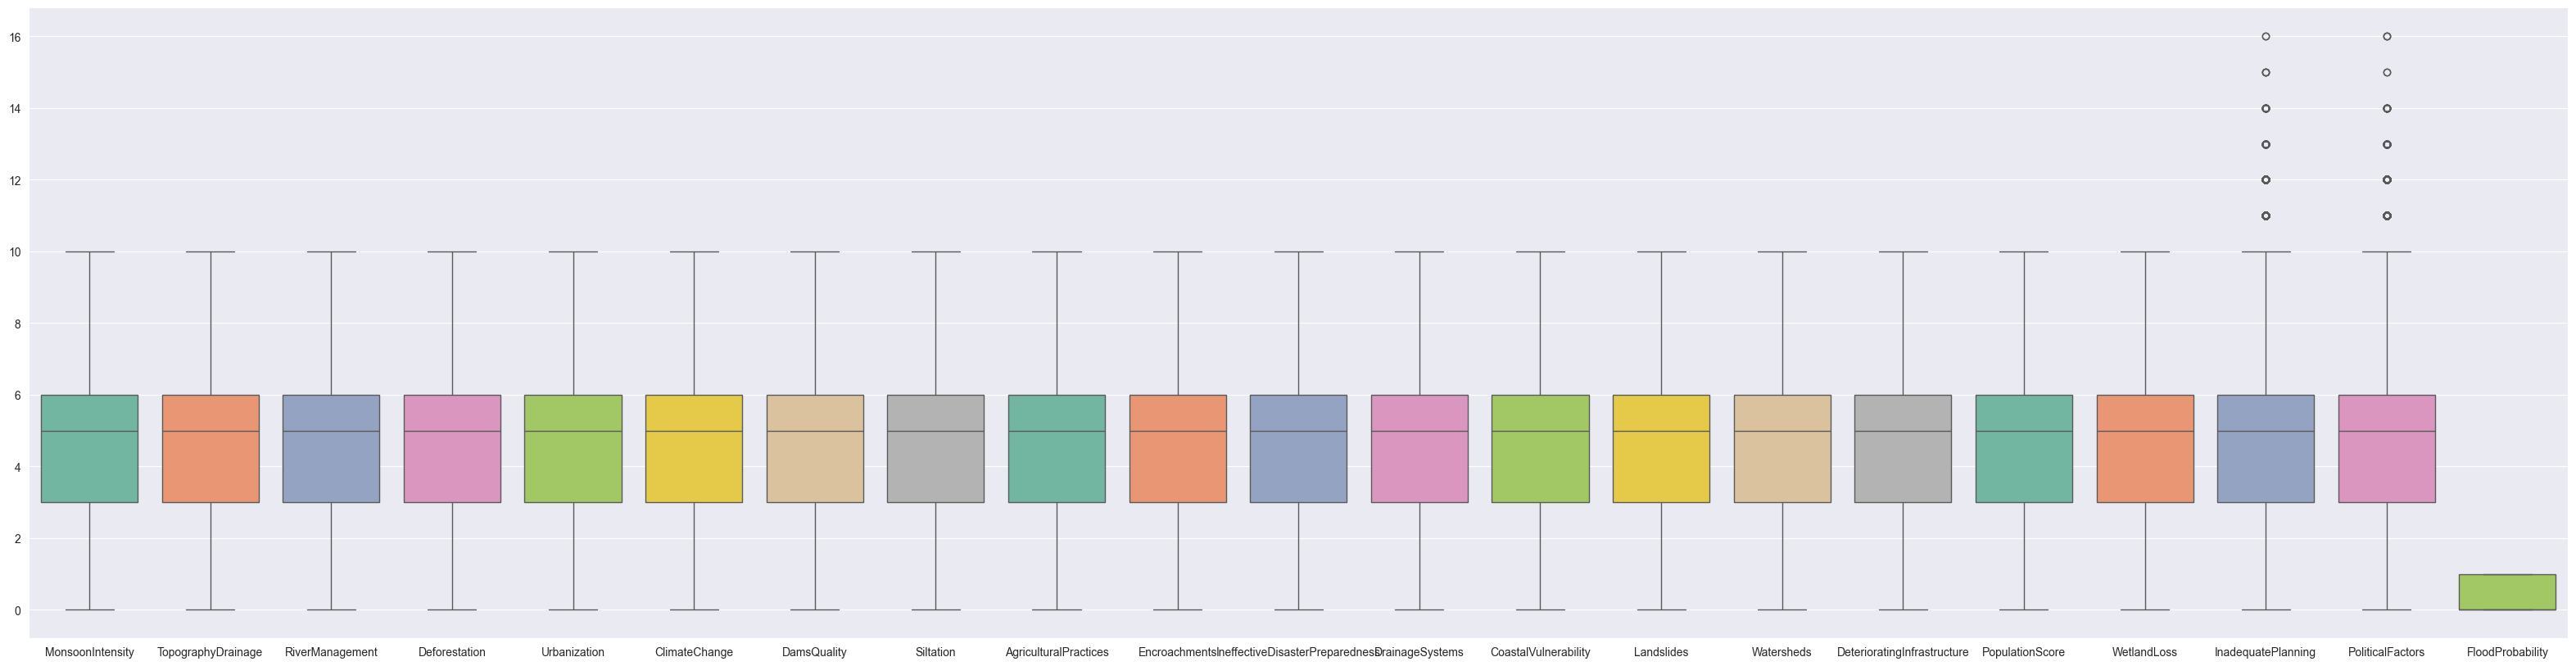

In [115]:
plt.figure(figsize=(40, 10))
sns.boxplot(data=df_cleaned, orient="v", palette="Set2")

In [116]:
num_0 = (df_cleaned["FloodProbability"] == 0).sum()
num_1 = (df_cleaned["FloodProbability"] == 1).sum()

print("number of class 0: ",num_0)
print("number of class 1: ",num_1)

number of class 0:  23283
number of class 1:  15707


In [117]:
def balance_data(num_to_delete,df,name_of_col):

    class_0_rows = df[df[name_of_col] == 0]

    if num_to_delete > len(class_0_rows):
        df = df[df[name_of_col] != 0]
    else:

        rows_to_delete = class_0_rows.sample(n=num_to_delete, random_state=42).index

        df = df.drop(rows_to_delete)

    return df

In [118]:
df = balance_data(7897,df_cleaned,"FloodProbability")

In [119]:
num_0 = (df["FloodProbability"] == 0).sum()
num_1 = (df["FloodProbability"] == 1).sum()

print("number of class 0: ",num_0)
print("number of class 1: ",num_1)

number of class 0:  15386
number of class 1:  15707


In [120]:
x = df.drop("FloodProbability" , axis = 1)
y = df["FloodProbability"]

In [121]:
x = np.array(x)
y = np.array(y)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3 , random_state=42)

In [123]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(21765, 20) (9328, 20) (21765,) (9328,)


In [124]:
yy = np.concatenate([y_train, y_test])

C:\Users\ahmed\AppData\Local\Temp\ipykernel_6872\3319459198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=yy.ravel(), palette='Set2')


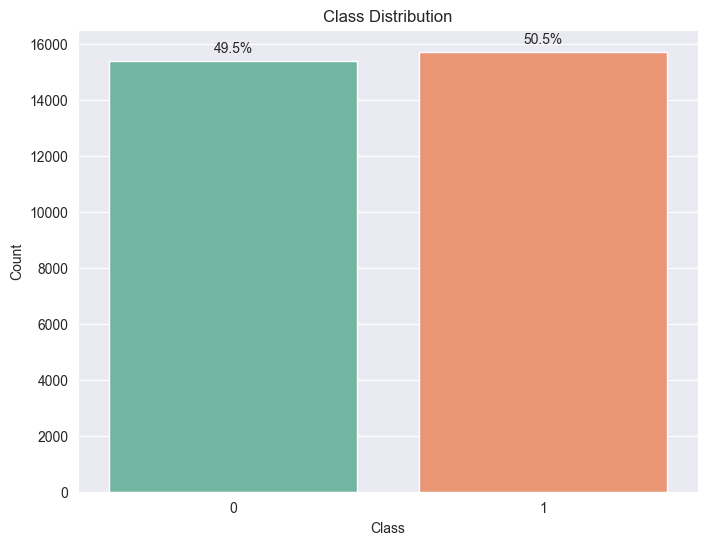

In [125]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x=yy.ravel(), palette='Set2')

total = len(yy)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.01 * total, f'{height/total:.1%}', ha="center")

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [126]:
xgboost = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)

xgboost.fit(x_train, y_train)
y_pred = xgboost.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)

0.9263507718696398


In [127]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4620
           1       0.92      0.94      0.93      4708

    accuracy                           0.93      9328
   macro avg       0.93      0.93      0.93      9328
weighted avg       0.93      0.93      0.93      9328
